In [85]:
from ps_utils import *
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import scipy.io as sio
plt.rcParams['figure.figsize'] = (20.0, 15.0)

In [2]:
beethoven = sio.loadmat('Beethoven.mat')
buddha = sio.loadmat('Buddha.mat')

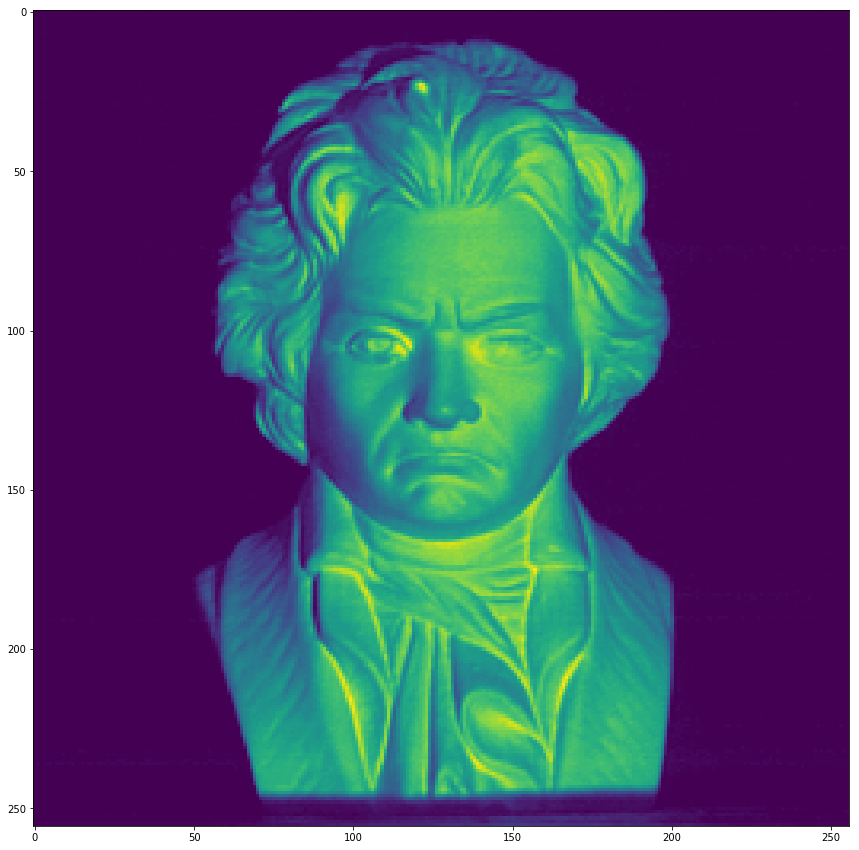

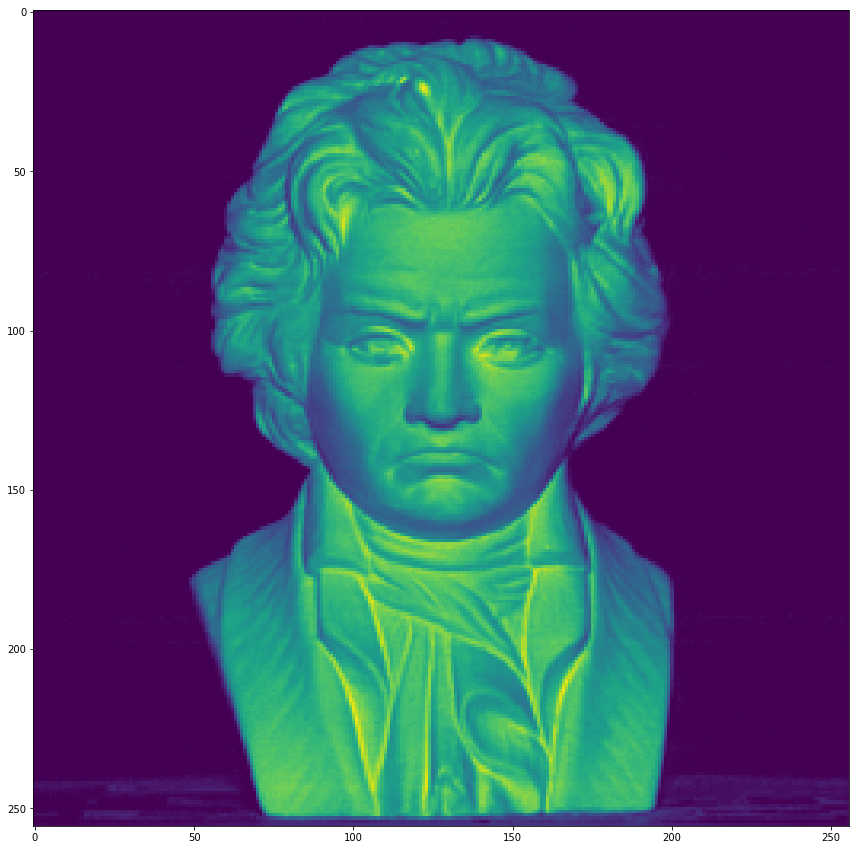

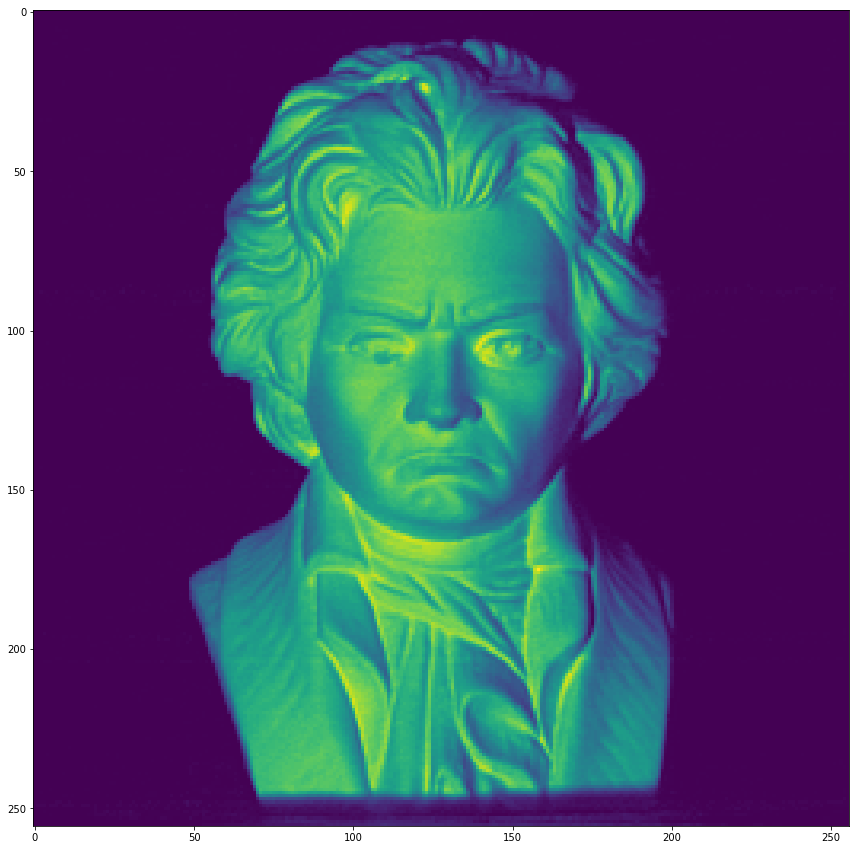

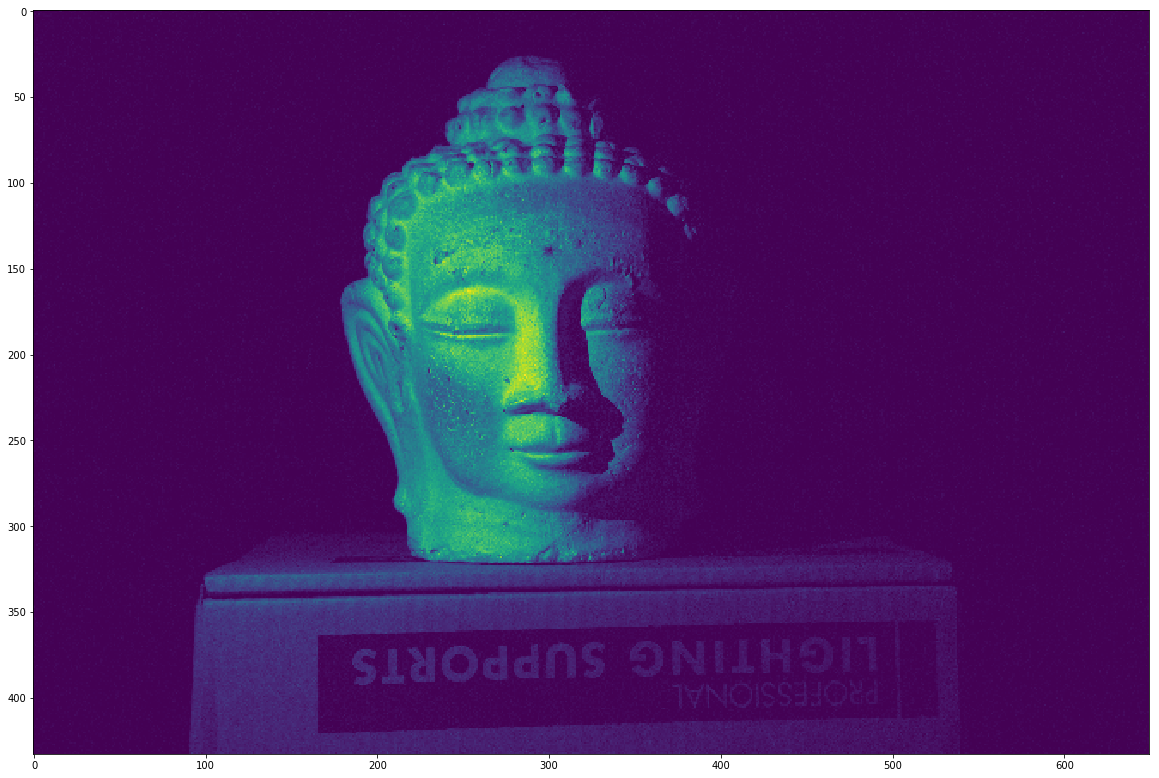

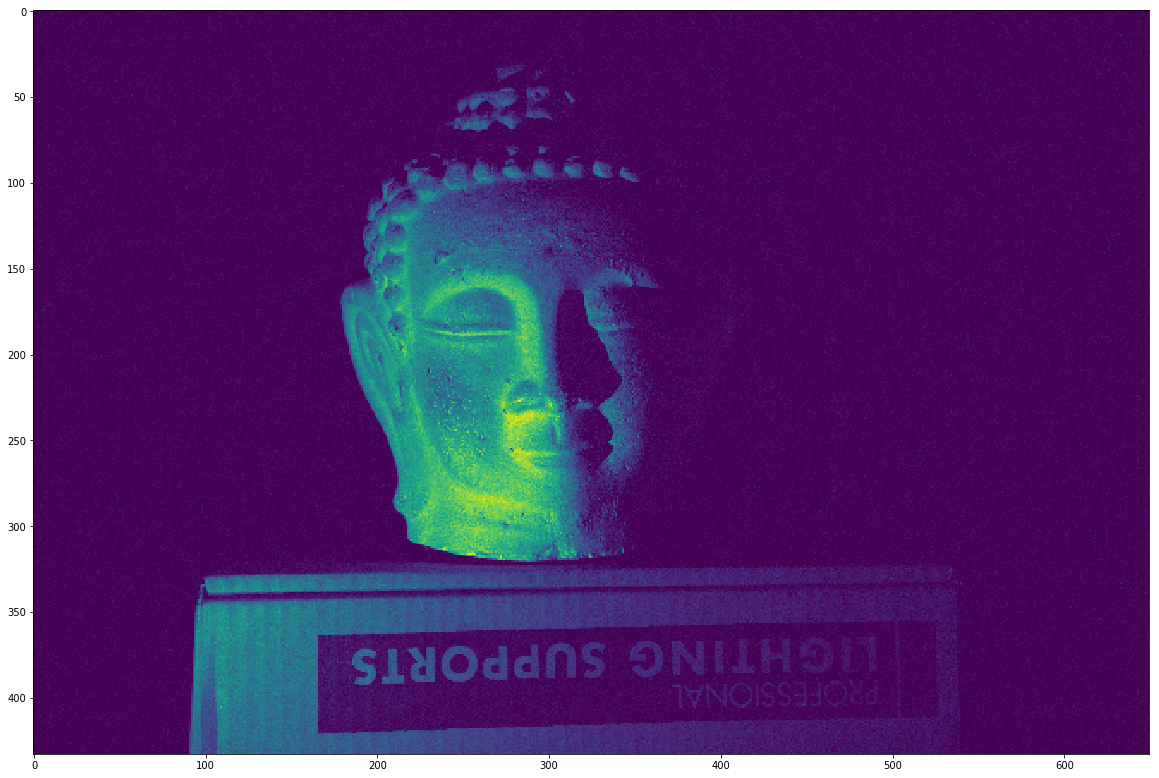

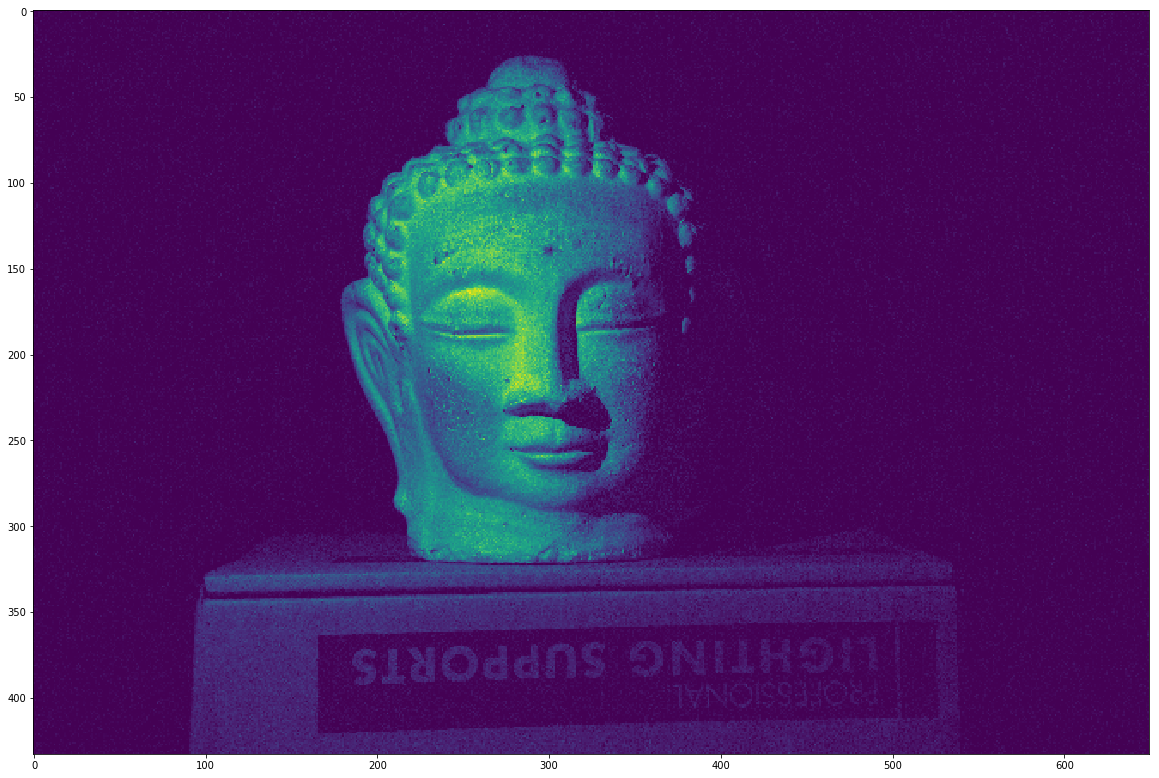

In [3]:
plt.imshow(beethoven['I'][:,:,0])
plt.show()
plt.imshow(beethoven['I'][:,:,1])
plt.show()
plt.imshow(beethoven['I'][:,:,2])
plt.show()

plt.imshow(buddha['I'][:,:,0])
plt.show()
plt.imshow(buddha['I'][:,:,1])
plt.show()
plt.imshow(buddha['I'][:,:,2])
plt.show()

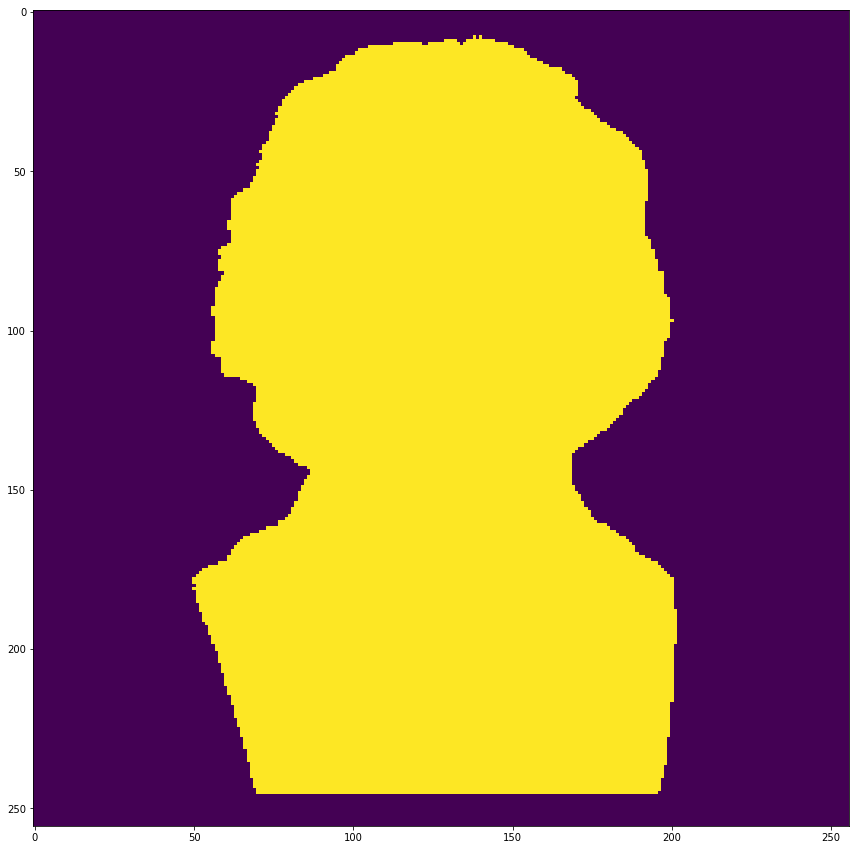

In [4]:
buddha['mask'].shape
buddha['S']

plt.imshow(beethoven['mask'])
plt.show()

C:\Users\Usert\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


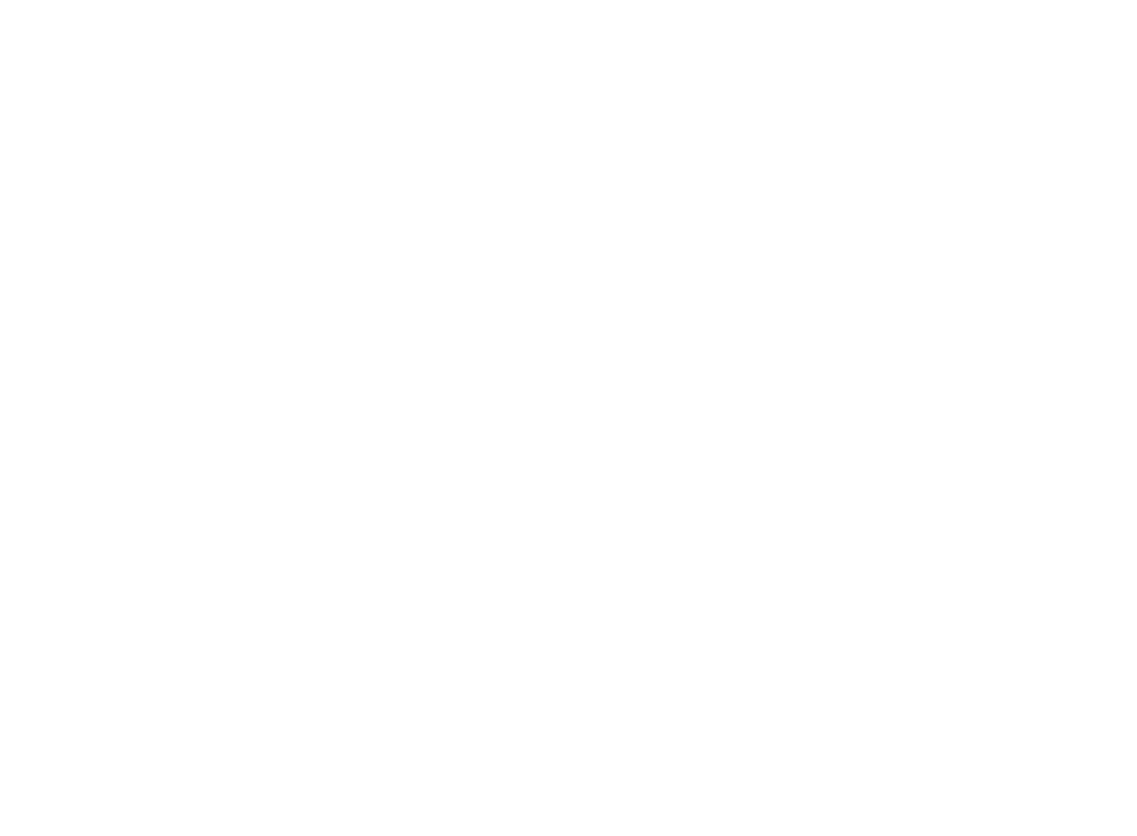

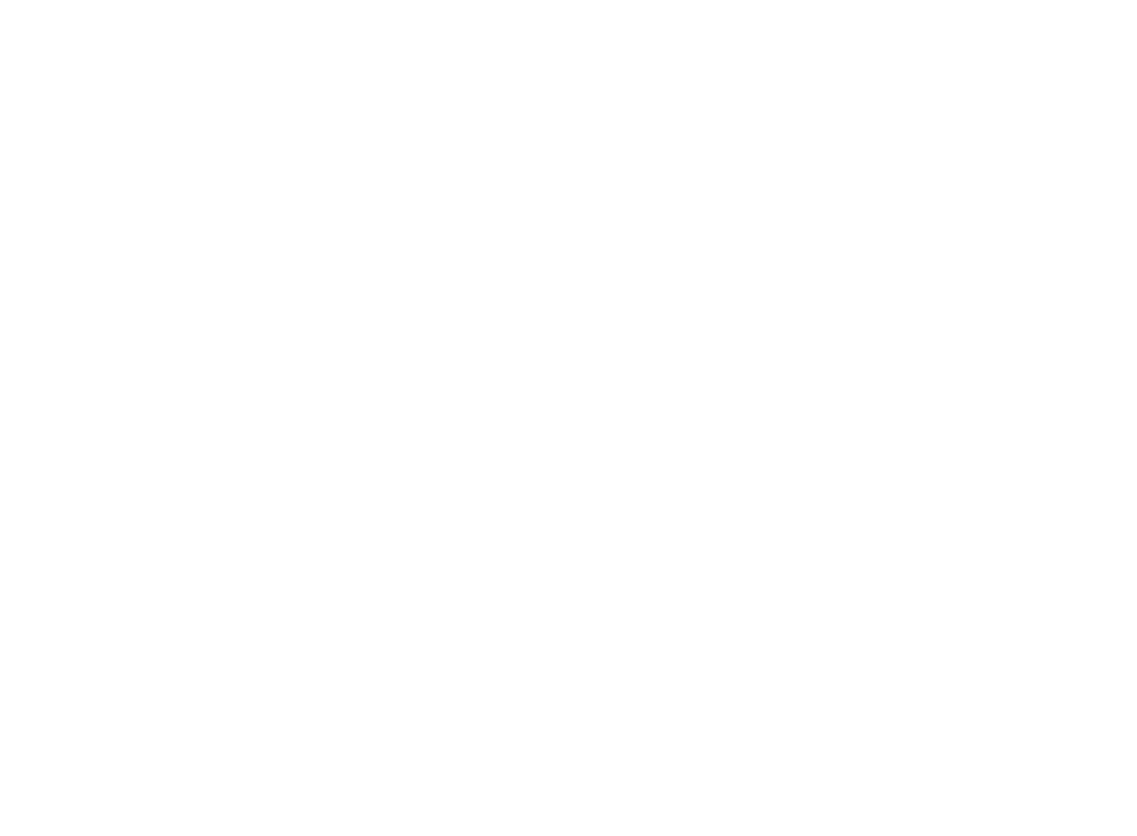

KeyboardInterrupt: 

In [89]:
def mask_that_boy():
    i_s, j_s = np.where(mask == 1)
    resized_mask = mask[min(i_s):max(i_s), min(j_s):max(j_s)]
    resized_images = images[:, min(i_s):max(i_s), min(j_s):max(j_s)]
    return resized_images, resized_mask

def get_3Dirty(filename):
    all_images = sio.loadmat(filename)
    global images
    images = all_images['I']
    global mask
    mask = all_images['mask']
    global S
    S = all_images['S']    
    global shape
    
    images = np.stack([images[:,:,i] for i in range(images.shape[2])], axis=0)
    images, mask = mask_that_boy()
    shape = images.shape
    images = np.reshape(images, (images.shape[0],images.shape[1]*images.shape[2]))
    
    if shape[0] > 3:
        Sinv = lin.pinv(S)
    else:
        Sinv = lin.inv(S)

    dot_pd = np.dot(Sinv, images)
    p = lin.norm(dot_pd, axis=0)
    N = dot_pd / p
    
    N = np.reshape(N, (3,shape[1],shape[2]))

    if shape[0] > 3:
        return simchony_integrate(N[0], N[1], N[2], mask)
    
    return unbiased_integrate(N[0], N[1], N[2], mask, order=2)

Dirty3 = get_3Dirty('Buddha.mat')

rotations = [Dirty3]

for i in range(3):
    Dirty3 = np.rot90(Dirty3)
    rotations.append(Dirty3)
    
prints = [display_depth_matplotlib(img) for img in rotations]

In [6]:
S = beethoven['S']
image_shape = bboy[0].shape
bboy = np.reshape(bboy, (3,36567))

S = lin.inv(S)


dotpd = np.dot(S, bboy)
p = lin.norm(dotpd, axis=0)
N = dotpd / p

output = []

N = np.reshape(N, (3,image_shape[0],image_shape[1]))
print(N.shape, N.size)
output.append(N)

(3, 239, 153) 109701


C:\Users\Usert\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(239, 153)


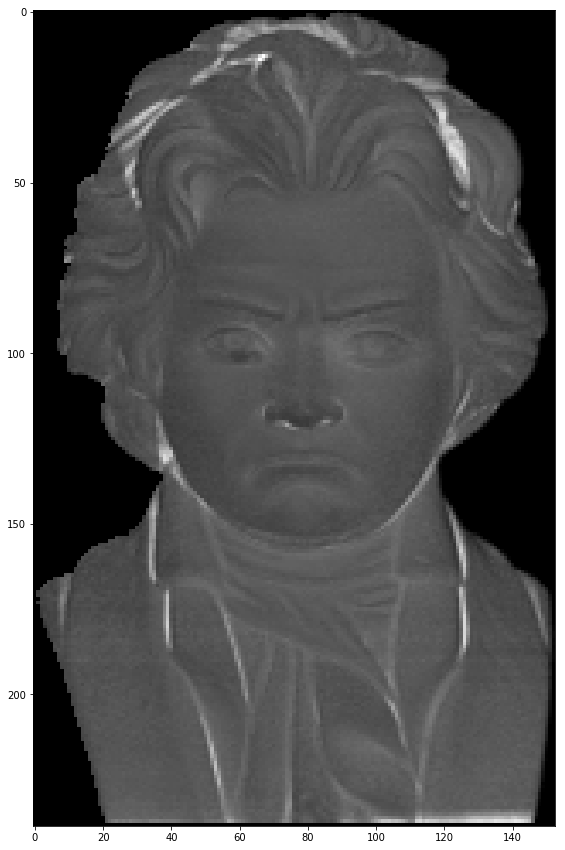

In [7]:
p = p.reshape(image_shape)
print(p.shape)
plt.imshow(p, 'gray')
plt.show()

C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


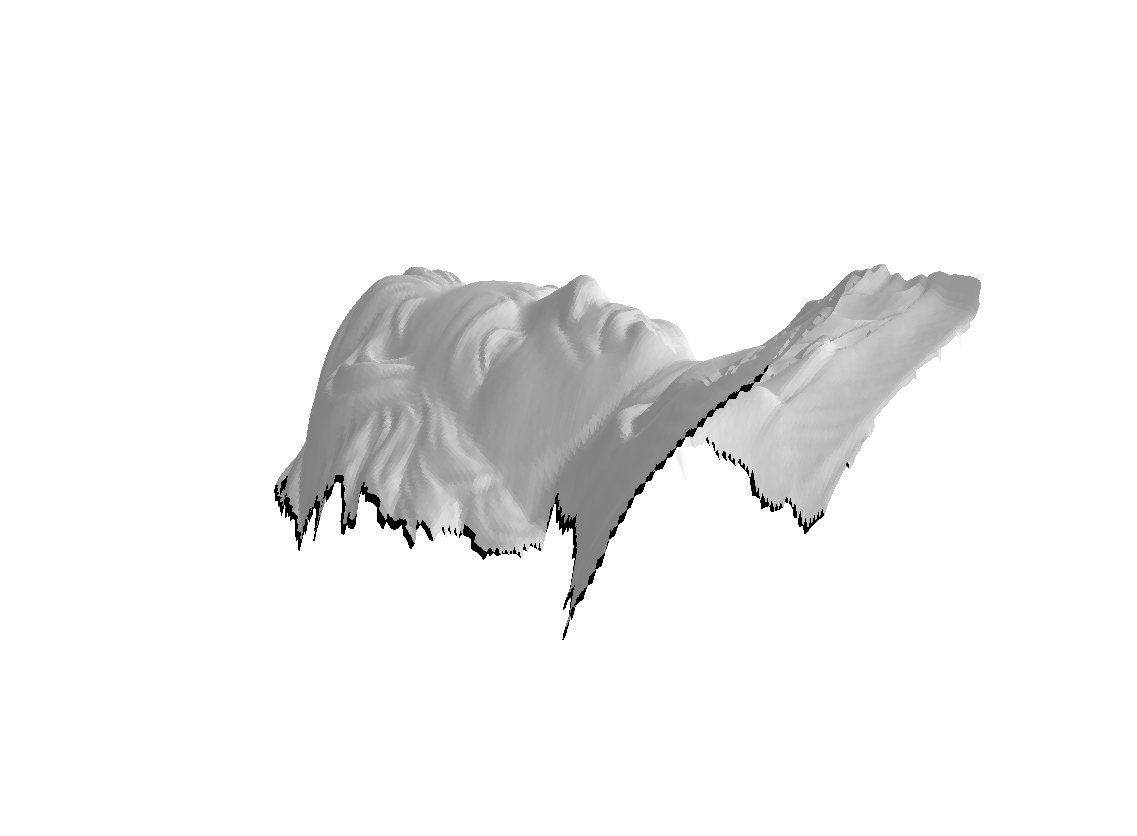

In [8]:
output_out = unbiased_integrate(N[0], N[1], N[2], mask, order=2)
display_depth_matplotlib(output_out)


C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


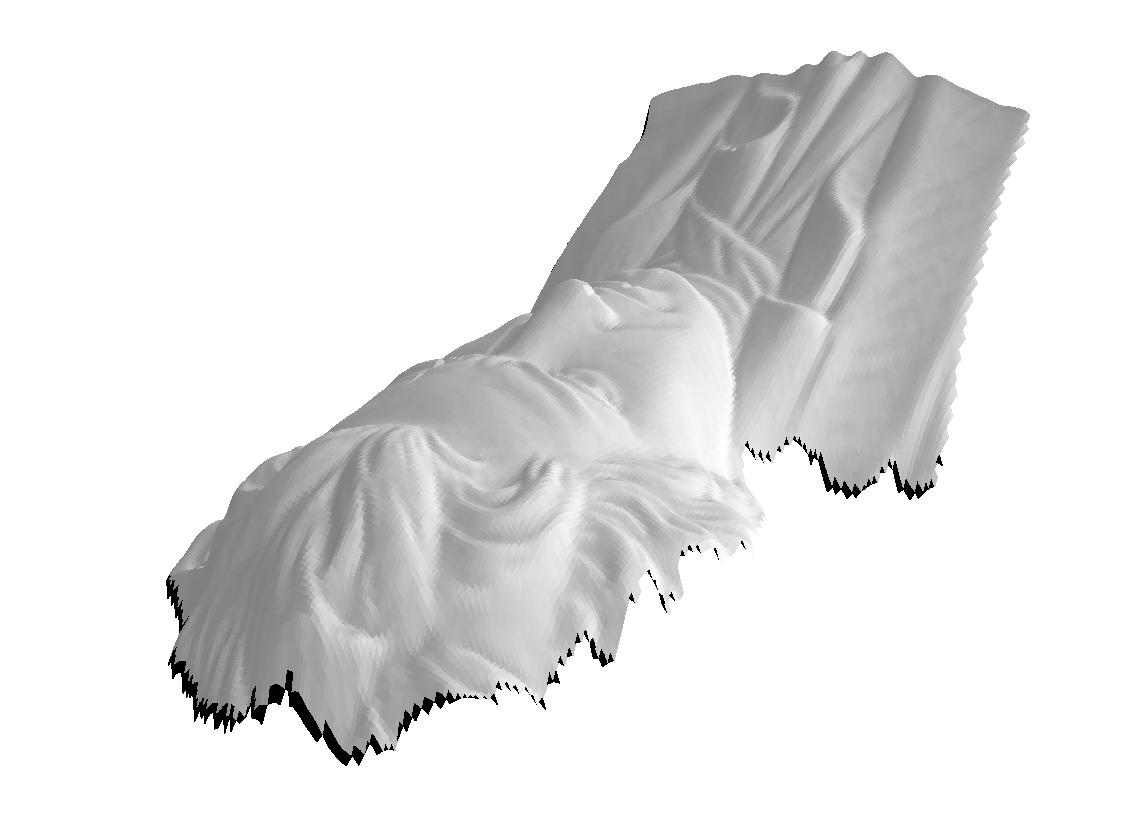

In [9]:
display_depth_matplotlib(np.rot90(output_out))

C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


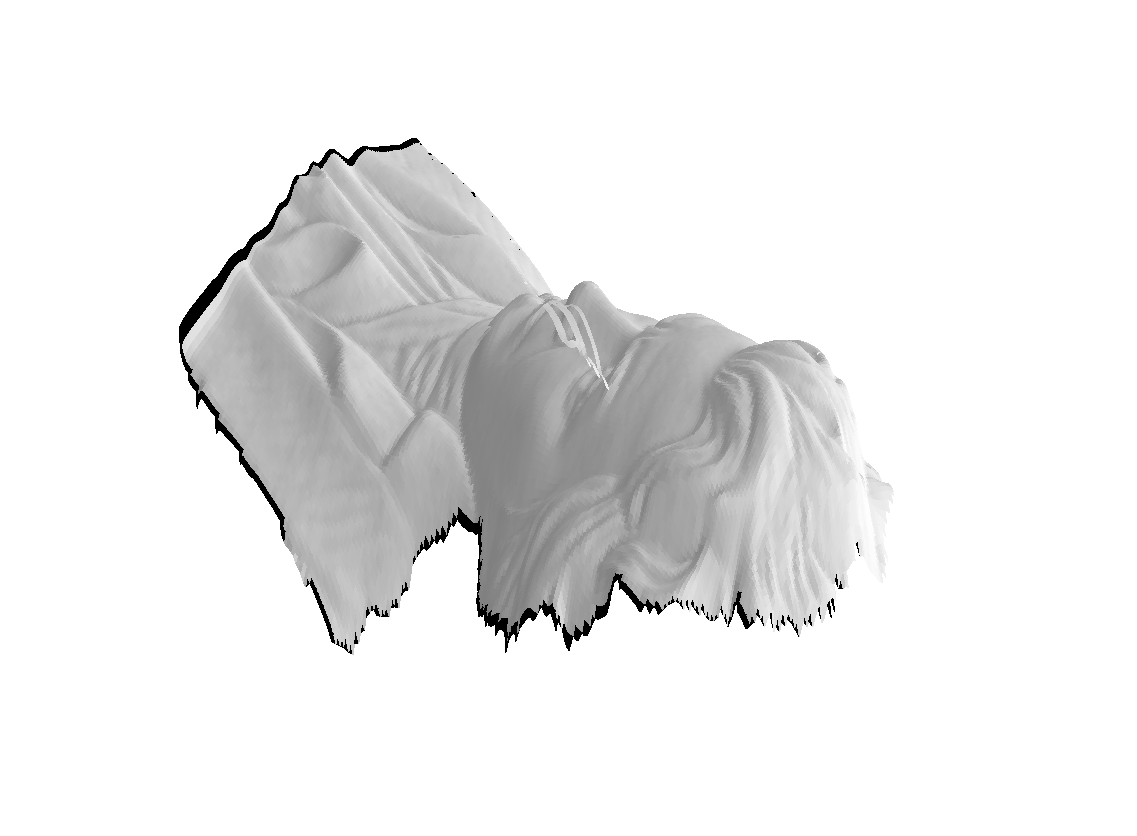

In [10]:
display_depth_matplotlib(np.rot90(np.rot90(output_out)))

C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\Usert\Anaconda3\lib\site-packages\matplotlib\colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


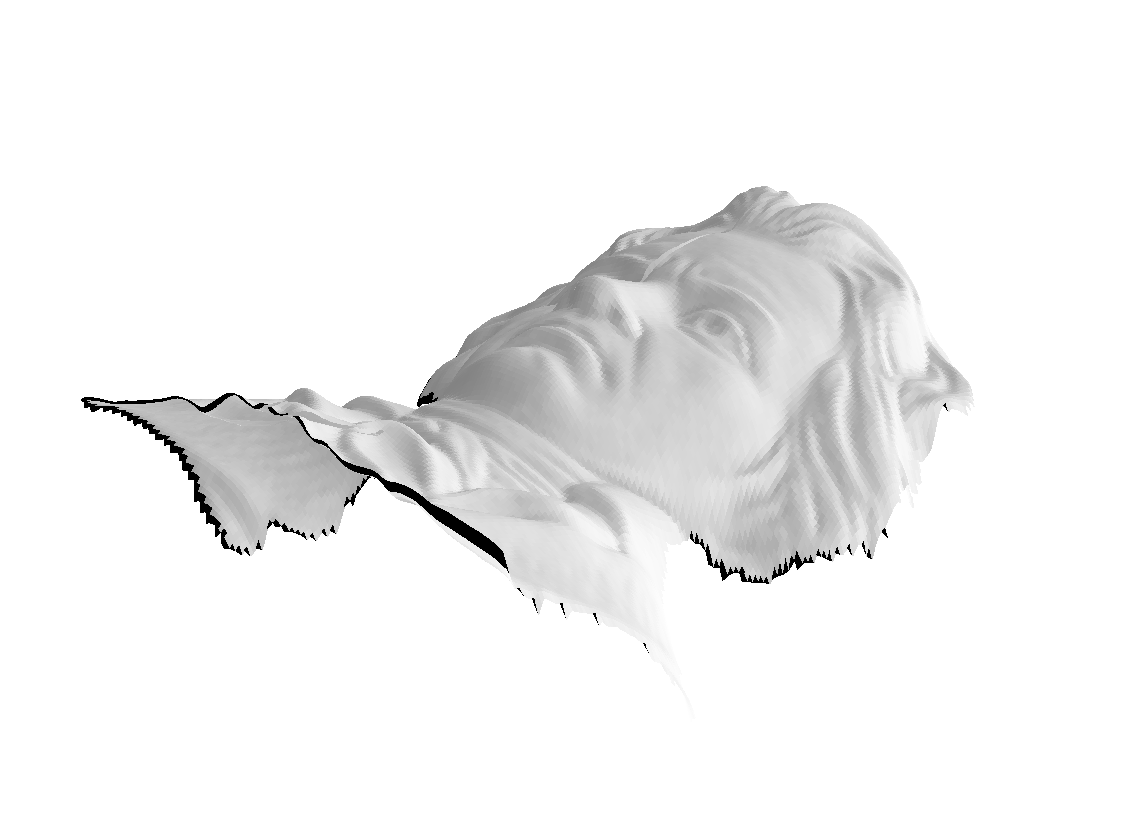

In [11]:
display_depth_matplotlib(np.rot90(np.rot90(np.rot90(output_out))))

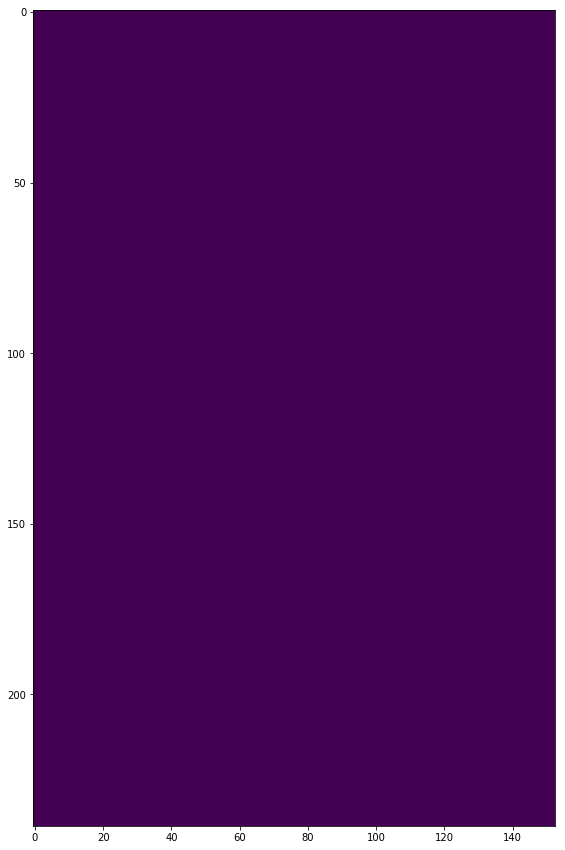

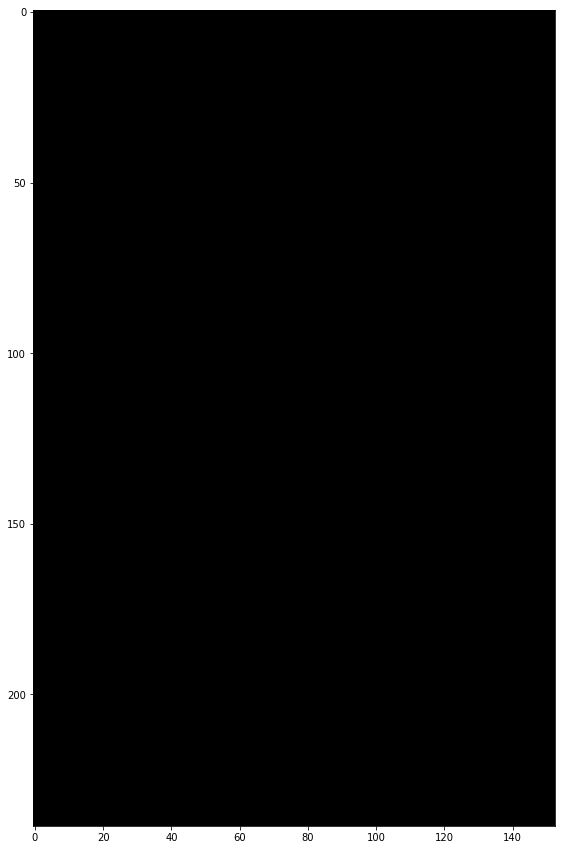

LinAlgError: Last 2 dimensions of the array must be square

In [12]:
mask = buddha["mask"][8:247,49:202]
budm = buddha["I"][8:247,49:202,:]

buddy = np.stack([budm[:,:,0]*mask,budm[:,:,1]*mask,budm[:,:,2]*mask], axis=0)
buddy.shape
plt.imshow(buddy[0])
plt.show()
plt.imshow(buddy[2], 'gray')
plt.show()

S = buddha['S']
image_shape = buddy[0].shape
buddy = np.reshape(buddy, (3,36567))

S = lin.inv(S)


dotpd = np.dot(S, buddy)
p = lin.norm(dotpd, axis=0)
N = dotpd / p

output = []

N = np.reshape(N, (3,image_shape[0],image_shape[1]))
print(N.shape, N.size)
output.append(N)

p = p.reshape(image_shape)
print(p.shape)
plt.imshow(p, 'gray')
plt.show()

output_out = unbiased_integrate(N[0], N[1], N[2], mask, order=2)
display_depth_matplotlib(output_out)